# Import Library

In [95]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# imputer (Missing Data Handling)
from sklearn.impute import SimpleImputer

# os
import os

In [96]:
# Pd Display
def pdisplay(df):
    display(pd.DataFrame(df))

# Import Data

In [97]:
train_df = pd.read_csv('heart.csv')

In [98]:
train_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Analysis

## Analyze the data

In [99]:
pdisplay(train_df.dtypes)

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [100]:
object_cols = train_df.select_dtypes(include=['object']).columns
object_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [101]:
num_cols = train_df.select_dtypes(exclude=['object']).columns
num_cols

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [102]:
#value counts of object columns
for col in object_cols:
    pdisplay(train_df[col].value_counts())

,count
Sex,
M,725
F,193


,count
ChestPainType,
ASY,495
NAP,203
ATA,172
TA,46


,count
RestingECG,
Normal,552
LVH,188
ST,178


,count
ExerciseAngina,
N,544
Y,371


,count
ST_Slope,
Flat,460
Up,395
Down,63


In [103]:
train_df.isnull().sum()

Age               0
Sex               0
ChestPainType     2
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    3
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [104]:
train_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [105]:
train_df.describe(include=['O'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,916,918,915,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,495,552,544,460


## Assumptions based on Data Analysis

## Analysis using pivot tables

In [106]:
# group by of object columns
for col in object_cols:
    pdisplay(train_df[['HeartDisease', col]].groupby([col]).mean())

,HeartDisease
Sex,
F,0.259067
M,0.631724


,HeartDisease
ChestPainType,
ASY,0.791919
ATA,0.139535
NAP,0.354680
TA,0.434783


,HeartDisease
RestingECG,
LVH,0.563830
Normal,0.516304
ST,0.657303


,HeartDisease
ExerciseAngina,
N,0.349265
Y,0.851752


,HeartDisease
ST_Slope,
Down,0.777778
Flat,0.828261
Up,0.197468


- Mostly Male suffer from Heart disease
-  ASY Asymptomatic, absence of chest pain, but hints at Highest rate of  heart issues
- ST segment abnormality hints at Highest heart disease
- ExerciseAngina, if chest pain occurs during exercise highly chance suffering from heart disease
- if ST_Slope is flat, it hints at suffering from heart disease

# Data Visualization

In [107]:
train_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Correlating numerical features

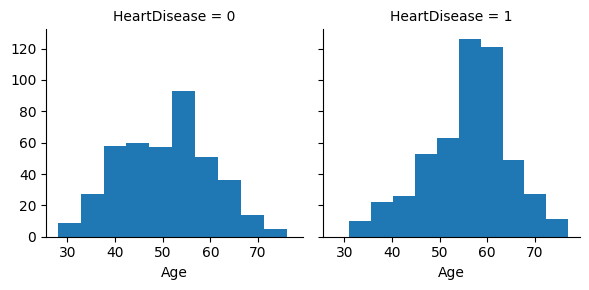

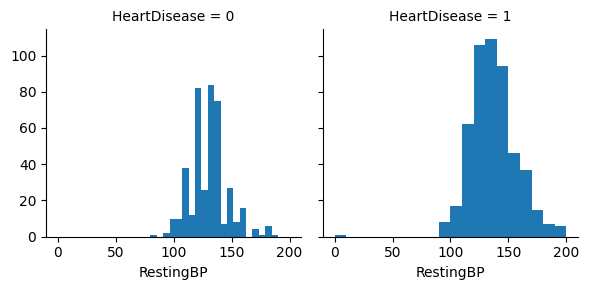

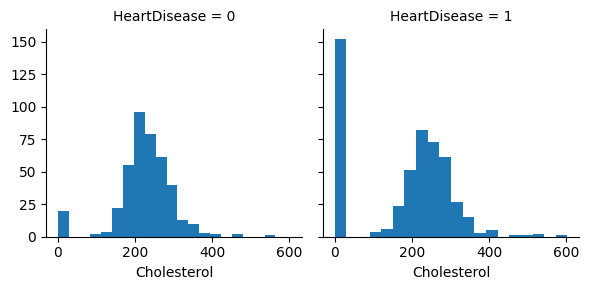

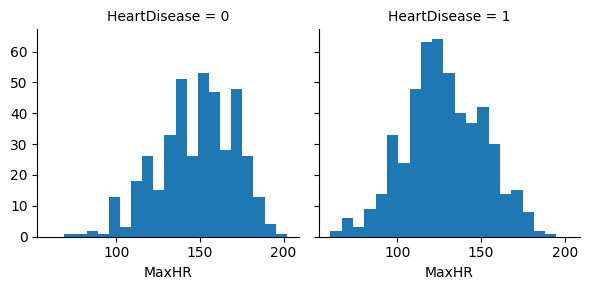

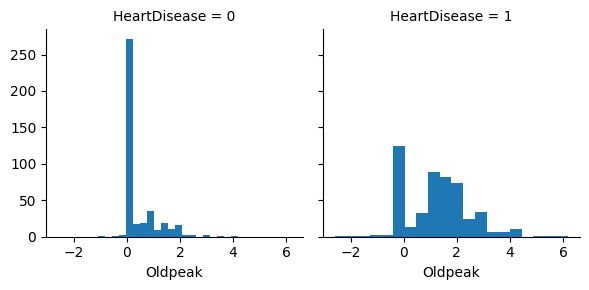

In [108]:
# gmap of numerical features
g = sns.FacetGrid(train_df, col='HeartDisease')
g.map(plt.hist, 'Age', bins=10)
g = sns.FacetGrid(train_df, col='HeartDisease')
g.map(plt.hist, 'RestingBP', bins=20)
g = sns.FacetGrid(train_df, col='HeartDisease')
g.map(plt.hist, 'Cholesterol', bins=20)
g = sns.FacetGrid(train_df, col='HeartDisease')
g.map(plt.hist, 'MaxHR', bins=20)
g = sns.FacetGrid(train_df, col='HeartDisease')
g.map(plt.hist, 'Oldpeak', bins=20)

- Most heart disease patient seems to be in the age of 55-65 years old
- If resting BP is in between 125-150 heart disease is likely to be highly
- Lowest cholesterol like zero level also indicates heart disease


## Correlating Categorical and Numerical Features

c:\Users\Asus\Documents\Lab\EEE4710\lab3\.venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


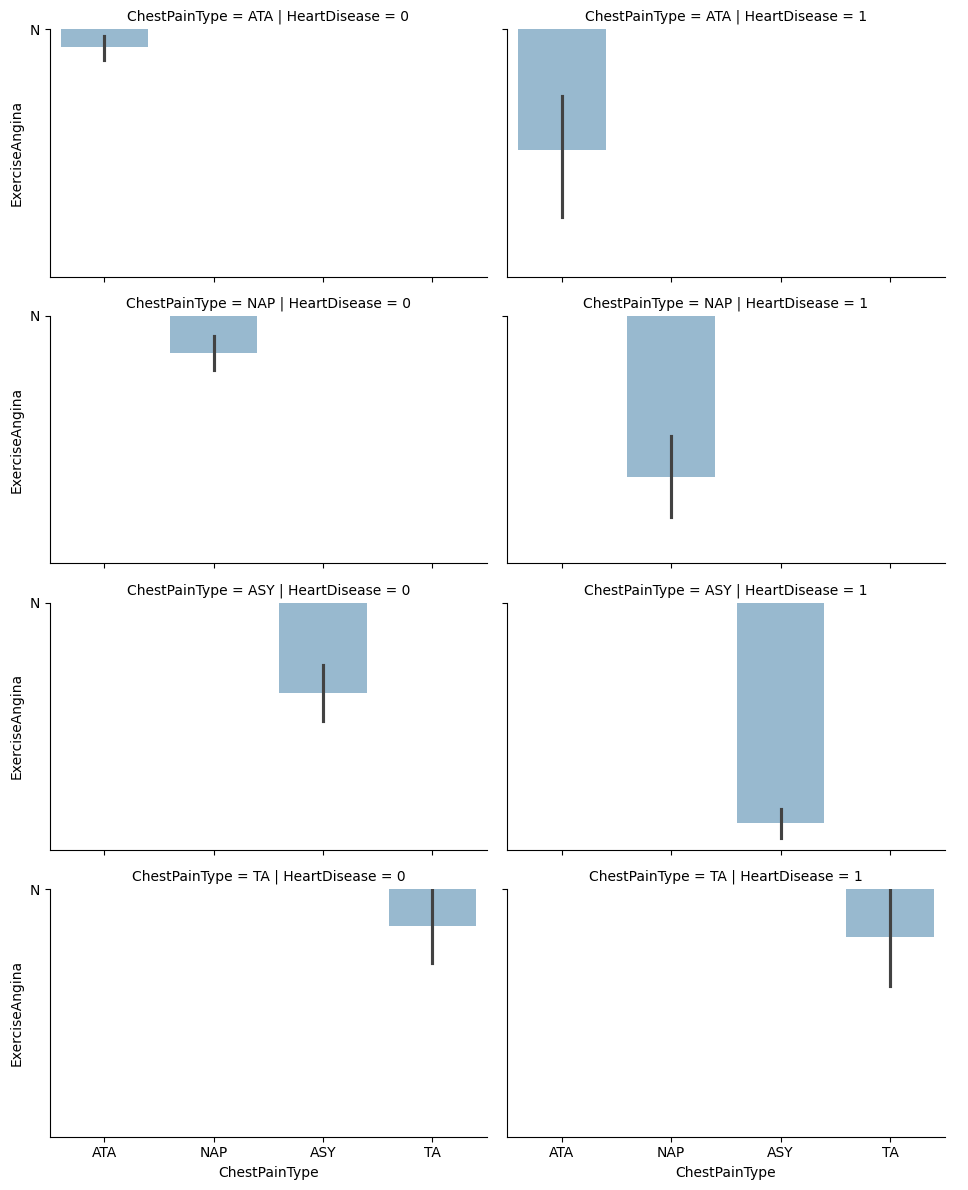

In [109]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='ChestPainType', col='HeartDisease', aspect=1.6)
grid.map(sns.barplot, 'ChestPainType', 'ExerciseAngina', alpha=.5)
grid.add_legend()

If there is ExerciseAngina and chestpaintype is ASY the patient is likely to have heart disease

# Feature Engineering

## Dropping irrelevant features

- No features seem irrelevant so no need to drop any features 

## Converting categorical feature to numerical

In [110]:
# Converting Categorical to Numerical
train_df['Sex'] = train_df['Sex'].map({'M': 1, 'F': 0})
train_df['ChestPainType'] = train_df['ChestPainType'].map({'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3})
train_df['RestingECG'] = train_df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
train_df['ExerciseAngina'] = train_df['ExerciseAngina'].map({'N': 0, 'Y': 1})
train_df['ST_Slope'] = train_df['ST_Slope'].map({'Flat': 0, 'Up': 1, 'Down': 2})

train_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1.0,140,289,0,0,172,0.0,0.0,1,0
1,49,0,2.0,160,180,0,0,156,0.0,1.0,0,1
2,37,1,1.0,130,283,0,1,98,0.0,0.0,1,0
3,48,0,0.0,138,214,0,0,108,1.0,1.5,0,1
4,54,1,2.0,150,195,0,0,122,0.0,0.0,1,0


## Missing data handling

In [112]:
train_df.isnull().sum()

Age               0
Sex               0
ChestPainType     2
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    3
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [113]:
train_df_column_name = train_df.columns
train_df_column_name

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [114]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train_df = imp.fit_transform(pd.DataFrame(train_df))
train_df = pd.DataFrame(train_df , columns=train_df_column_name)
train_df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1.0,1.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,2.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,0.0,1.0
2,37.0,1.0,1.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,0.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,0.0,1.0
4,54.0,1.0,2.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0


In [115]:
train_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Correlation Analysis

In [116]:
train_df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.078358,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.214166,0.258612,-0.093424,0.282039
Sex,0.055750,1.000000,-0.126277,0.005133,-0.200092,0.120076,-0.018343,-0.189186,0.190060,0.105734,-0.066831,0.305445
ChestPainType,-0.078358,-0.126277,1.000000,-0.021086,0.068092,-0.073534,0.019756,0.290248,-0.357059,-0.177982,0.131416,-0.387694
RestingBP,0.254399,0.005133,-0.021086,1.000000,0.100893,0.070193,0.097661,-0.112135,0.152002,0.164803,-0.083418,0.107589
Cholesterol,-0.095282,-0.200092,0.068092,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.033803,0.050148,0.007110,-0.232741
FastingBS,0.198039,0.120076,-0.073534,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.059028,0.052698,-0.043534,0.267291
RestingECG,0.213152,-0.018343,0.019756,0.097661,0.112095,0.050707,1.000000,0.048552,0.034134,0.114428,-0.005282,0.061011
MaxHR,-0.382045,-0.189186,0.290248,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.369224,-0.160691,0.246927,-0.400421
ExerciseAngina,0.214166,0.190060,-0.357059,0.152002,-0.033803,0.059028,0.034134,-0.369224,1.000000,0.407803,-0.254487,0.495448
Oldpeak,0.258612,0.105734,-0.177982,0.164803,0.050148,0.052698,0.114428,-0.160691,0.407803,1.000000,-0.097323,0.403951


<Axes: >

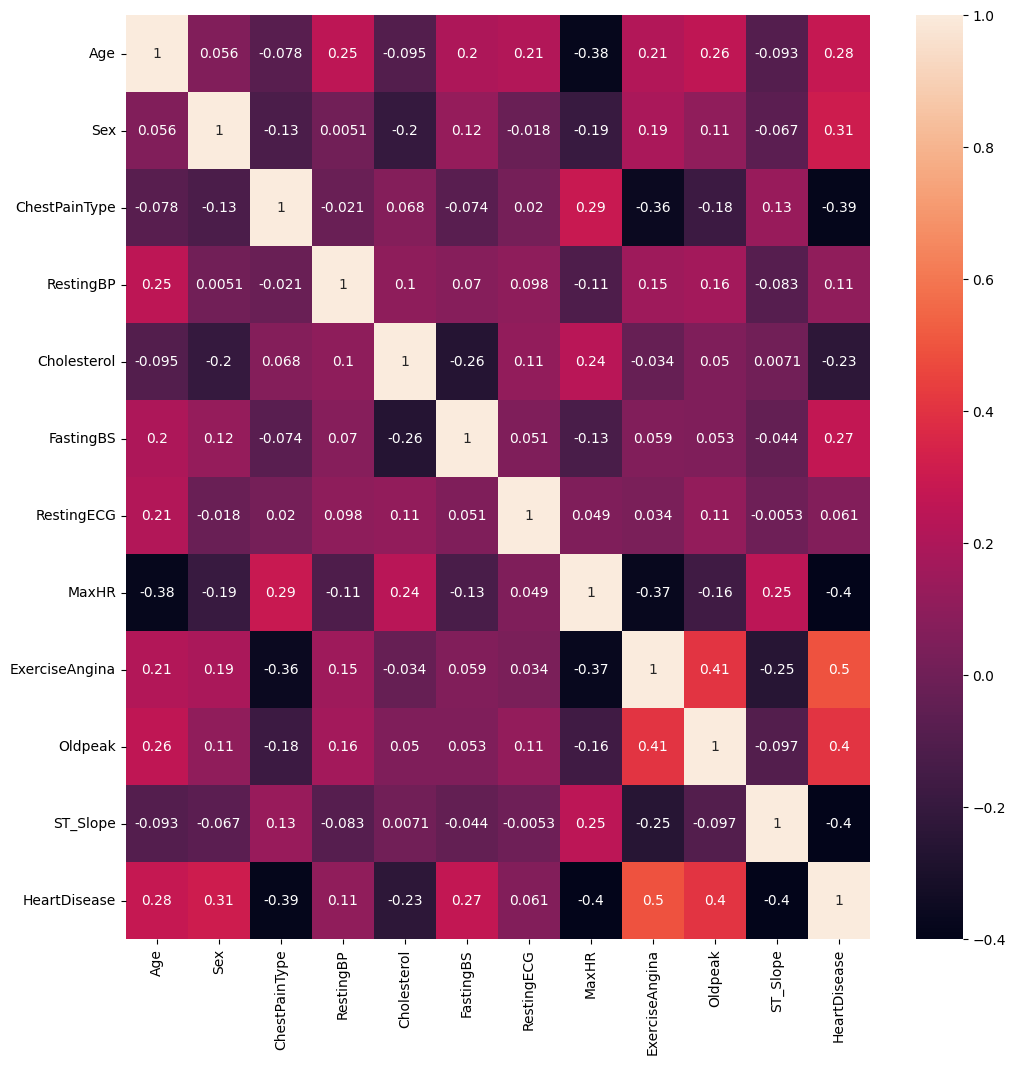

In [117]:
plt.figure(figsize=(12,12))
sns.heatmap(train_df.corr(), annot=True)

- Each feature is different and unique so need to create new feature

# Train Test split

In [119]:
# Train test split
from sklearn.model_selection import train_test_split
X = train_df.drop('HeartDisease', axis=1)
y = train_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=108)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(734, 11) (734,)
(184, 11) (184,)
